# 🎮 单元一：绘制五子棋棋盘

## 教学目标
- 掌握 tkinter 库的基本使用
- 绘制 15x15 的棋盘网格
- 为后续落子与判断做准备

In [ ]:
import tkinter as tk

BOARD_SIZE = 15
GRID_SIZE = 40
BOARD_PIXEL = GRID_SIZE * (BOARD_SIZE - 1)

root = tk.Tk()
root.title("五子棋")

canvas = tk.Canvas(root, width=BOARD_PIXEL, height=BOARD_PIXEL, bg='#F0D9B5')
canvas.pack()

# 画棋盘线
for i in range(BOARD_SIZE):
    canvas.create_line(GRID_SIZE * i, 0, GRID_SIZE * i, BOARD_PIXEL)
    canvas.create_line(0, GRID_SIZE * i, BOARD_PIXEL, GRID_SIZE * i)

root.mainloop()

✅ **动手练习**：尝试将棋盘颜色改为白色，或调整网格大小。

🎯 **挑战**：在棋盘中间绘制五个“天元点”（即星位）用作装饰。

# ✏️ 单元二：实现玩家落子功能

## 教学目标
- 实现鼠标点击落子
- 用二维数组记录棋盘状态
- 显示黑白棋子交替

In [ ]:
import tkinter as tk

BOARD_SIZE = 15
GRID_SIZE = 40
STONE_RADIUS = 15

board = [[0] * BOARD_SIZE for _ in range(BOARD_SIZE)]
turn = 1  # 1 表示黑子，2 表示白子

def draw_stone(x, y, player):
    color = "black" if player == 1 else "white"
    canvas.create_oval(
        x - STONE_RADIUS, y - STONE_RADIUS,
        x + STONE_RADIUS, y + STONE_RADIUS,
        fill=color)

def click(event):
    global turn
    col = round(event.x / GRID_SIZE)
    row = round(event.y / GRID_SIZE)
    if 0 <= row < BOARD_SIZE and 0 <= col < BOARD_SIZE:
        if board[row][col] == 0:
            board[row][col] = turn
            draw_stone(col * GRID_SIZE, row * GRID_SIZE, turn)
            turn = 3 - turn  # 黑白轮换

root = tk.Tk()
canvas = tk.Canvas(root, width=GRID_SIZE*BOARD_SIZE, height=GRID_SIZE*BOARD_SIZE, bg='#F0D9B5')
canvas.pack()

# 绘制棋盘
for i in range(BOARD_SIZE):
    canvas.create_line(GRID_SIZE * i, 0, GRID_SIZE * i, GRID_SIZE * (BOARD_SIZE - 1))
    canvas.create_line(0, GRID_SIZE * i, GRID_SIZE * (BOARD_SIZE - 1), GRID_SIZE * i)

canvas.bind("<Button-1>", click)
root.mainloop()

✅ **动手练习**：让程序显示当前轮到谁下。

🎯 **挑战**：避免重复点击同一位置时再次落子。

# 🏆 单元三：判断胜负

## 教学目标
- 实现五子连珠判断
- 检查横/竖/斜方向是否有连续 5 个相同棋子

In [ ]:
def check_win(r, c, player):
    directions = [(1,0), (0,1), (1,1), (1,-1)]
    for dr, dc in directions:
        count = 1
        for i in range(1, 5):
            nr, nc = r + dr*i, c + dc*i
            if 0 <= nr < BOARD_SIZE and 0 <= nc < BOARD_SIZE and board[nr][nc] == player:
                count += 1
            else:
                break
        for i in range(1, 5):
            nr, nc = r - dr*i, c - dc*i
            if 0 <= nr < BOARD_SIZE and 0 <= nc < BOARD_SIZE and board[nr][nc] == player:
                count += 1
            else:
                break
        if count >= 5:
            return True
    return False

✅ **动手练习**：调用 `check_win()` 检查每一步是否胜利，并弹窗提示。

🎯 **挑战**：尝试实现“和棋”判断。

# 🤖 单元四：添加简单AI对手

## 教学目标
- 学习用评分函数模拟“聪明的下法”
- AI 扫描棋盘所有空位，打分并选择最高

In [ ]:
def evaluate_point(r, c, player):
    # 简化评分函数：上下左右判断是否有相邻棋子
    score = 0
    directions = [(1,0), (0,1), (1,1), (1,-1)]
    for dr, dc in directions:
        for i in range(1, 3):
            nr, nc = r + dr*i, c + dc*i
            if 0 <= nr < BOARD_SIZE and 0 <= nc < BOARD_SIZE and board[nr][nc] == player:
                score += 10
    return score

def ai_move():
    best_score = -1
    move = (7, 7)
    for r in range(BOARD_SIZE):
        for c in range(BOARD_SIZE):
            if board[r][c] == 0:
                s = evaluate_point(r, c, 2)
                if s > best_score:
                    best_score = s
                    move = (r, c)
    board[move[0]][move[1]] = 2
    draw_stone(move[1] * GRID_SIZE, move[0] * GRID_SIZE, 2)

✅ **动手练习**：尝试让 AI 在每次玩家落子后立即落子。

🎯 **挑战**：增加对“堵住玩家五连”的判断，让 AI 更“聪明”。

# 🧠 单元五：项目优化建议

- 添加悔棋功能（使用列表保存每一步）
- 添加胜利弹窗（用 `tk.messagebox`）
- 美化界面（加入棋子图像或动画）

🎯 最终挑战项目建议：
- 完整封装为类结构
- 制作“人机对战”完整版本，支持设置先手、难度等

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from ipywidgets import Button, Output, VBox, HBox
from IPython.display import display, clear_output

class GomokuGame:
    def __init__(self, size=15):
        self.size = size
        self.board = np.zeros((size, size), dtype=int)
        self.current_player = 1  # 1 for black, 2 for white
        self.game_over = False
        self.fig, self.ax = plt.subplots(figsize=(8, 8))
        self.output = Output(layout={'border': '1px solid black', 'width': '800px', 'height': '600px'})
        self.setup_board()
        
    def setup_board(self):
        with self.output:
            clear_output(wait=True)
            self.ax.clear()
            self.ax.set_xticks(np.arange(0, self.size, 1))
            self.ax.set_yticks(np.arange(0, self.size, 1))
            self.ax.set_xticklabels([])
            self.ax.set_yticklabels([])
            self.ax.grid(color='black', linestyle='-', linewidth=1)
            self.ax.set_xlim(-0.5, self.size-0.5)
            self.ax.set_ylim(-0.5, self.size-0.5)
            self.ax.set_title(f"五子棋游戏 - 当前玩家: {'黑棋' if self.current_player == 1 else '白棋'}", fontsize=14)
            self.ax.set_facecolor('#DCB35C')  # 棋盘底色
            
            # 绘制已有棋子
            for i in range(self.size):
                for j in range(self.size):
                    if self.board[i, j] == 1:
                        self.ax.add_patch(Circle((j, i), 0.4, color='black'))
                    elif self.board[i, j] == 2:
                        self.ax.add_patch(Circle((j, i), 0.4, color='white', ec='black'))
            
            plt.show()
    
    def on_click(self, event):
        if self.game_over or not event.inaxes:
            return
            
        col = round(event.xdata)
        row = round(event.ydata)
        
        if 0 <= row < self.size and 0 <= col < self.size and self.board[row, col] == 0:
            self.board[row, col] = self.current_player
            
            if self.check_win(row, col):
                with self.output:
                    clear_output(wait=True)
                    self.ax.set_title(f"{'黑棋' if self.current_player == 1 else '白棋'}获胜!", fontsize=14, color='red')
                    self.setup_board()
                self.game_over = True
            else:
                self.current_player = 3 - self.current_player  # 切换玩家
                with self.output:
                    clear_output(wait=True)
                    self.setup_board()
    
    def check_win(self, row, col):
        directions = [
            (0, 1),  # 水平
            (1, 0),  # 垂直
            (1, 1),  # 主对角线
            (1, -1)  # 副对角线
        ]
        
        for dr, dc in directions:
            count = 1
            # 正向检查
            for i in range(1, 5):
                r, c = row + i*dr, col + i*dc
                if 0 <= r < self.size and 0 <= c < self.size and self.board[r, c] == self.current_player:
                    count += 1
                else:
                    break
            # 反向检查
            for i in range(1, 5):
                r, c = row - i*dr, col - i*dc
                if 0 <= r < self.size and 0 <= c < self.size and self.board[r, c] == self.current_player:
                    count += 1
                else:
                    break
            
            if count >= 5:
                return True
        return False
    
    def reset_game(self):
        self.board = np.zeros((self.size, self.size), dtype=int)
        self.current_player = 1
        self.game_over = False
        with self.output:
            clear_output(wait=True)
            self.setup_board()

# 创建游戏实例
game = GomokuGame()

# 连接点击事件
game.fig.canvas.mpl_connect('button_press_event', game.on_click)

# 创建控制按钮
open_button = Button(description="打开五子棋游戏", button_style='success')
reset_button = Button(description="重新开始", button_style='info')
close_button = Button(description="关闭游戏窗口", button_style='danger')

# 按钮回调函数
def on_open_click(b):
    display(game.output)

def on_reset_click(b):
    game.reset_game()

def on_close_click(b):
    game.output.clear_output()

open_button.on_click(on_open_click)
reset_button.on_click(on_reset_click)
close_button.on_click(on_close_click)

# 显示控制按钮
controls = HBox([open_button, reset_button, close_button])
display(controls)

# 初始提示
# 初始提示
print('点击"打开五子棋游戏"按钮开始游戏')

点击"打开五子棋游戏"按钮开始游戏


Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 26827 (\N{CJK UNIFIED IDEOGRAPH-68CB}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 28216 (\N{CJK UNIFIED IDEOGRAPH-6E38}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWa

c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 26827 (\N{CJK UNIFIED IDEOGRAPH-68CB}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 28216 (\N{CJK UNIFIED IDEOGRAPH-6E38}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWa

c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 26827 (\N{CJK UNIFIED IDEOGRAPH-68CB}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 28216 (\N{CJK UNIFIED IDEOGRAPH-6E38}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWa

c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 26827 (\N{CJK UNIFIED IDEOGRAPH-68CB}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 28216 (\N{CJK UNIFIED IDEOGRAPH-6E38}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWa

c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 26827 (\N{CJK UNIFIED IDEOGRAPH-68CB}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 28216 (\N{CJK UNIFIED IDEOGRAPH-6E38}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWa

c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 26827 (\N{CJK UNIFIED IDEOGRAPH-68CB}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 28216 (\N{CJK UNIFIED IDEOGRAPH-6E38}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWa

c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 26827 (\N{CJK UNIFIED IDEOGRAPH-68CB}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 28216 (\N{CJK UNIFIED IDEOGRAPH-6E38}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWa

c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 26827 (\N{CJK UNIFIED IDEOGRAPH-68CB}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 28216 (\N{CJK UNIFIED IDEOGRAPH-6E38}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWa

c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 26827 (\N{CJK UNIFIED IDEOGRAPH-68CB}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWarning: Glyph 28216 (\N{CJK UNIFIED IDEOGRAPH-6E38}) missing from current font.
  self.manager.handle_json(content)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:278: UserWa

In [2]:
pip install ipywidgets ipympl

  Using cached ipympl-0.9.7-py3-none-any.whl.metadata (8.7 kB)
Using cached ipympl-0.9.7-py3-none-any.whl (515 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26827 (\N{CJK UNIFIED IDEOGRAPH-68CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages

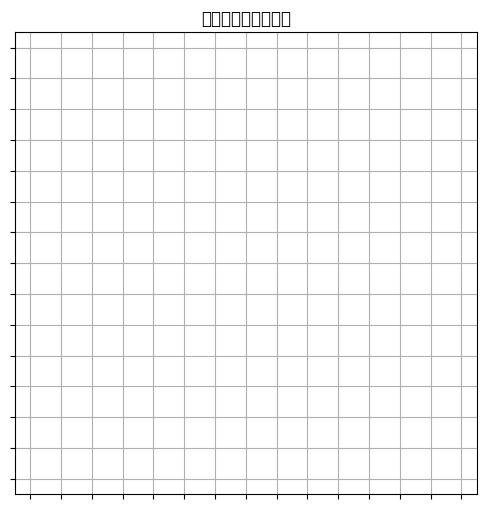

c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:335: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from current font.
  self.figure.savefig(buf, format='png', dpi='figure')
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:335: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  self.figure.savefig(buf, format='png', dpi='figure')
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:335: UserWarning: Glyph 26827 (\N{CJK UNIFIED IDEOGRAPH-68CB}) missing from current font.
  self.figure.savefig(buf, format='png', dpi='figure')
c:\Users\SAIRI\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:335: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  self.figure.savefig(buf, format='png', dpi='figure')
c:\Users\SAIRI\AppData\Local\Pro

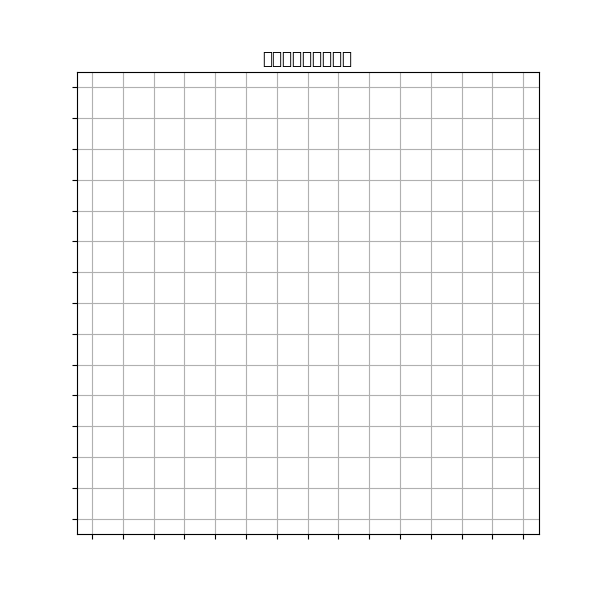

C:\Users\SAIRI\AppData\Local\Temp\ipykernel_5784\1057744998.py:39: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from current font.
  fig.canvas.draw()  # 显式刷新图像
C:\Users\SAIRI\AppData\Local\Temp\ipykernel_5784\1057744998.py:39: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  fig.canvas.draw()  # 显式刷新图像
C:\Users\SAIRI\AppData\Local\Temp\ipykernel_5784\1057744998.py:39: UserWarning: Glyph 26827 (\N{CJK UNIFIED IDEOGRAPH-68CB}) missing from current font.
  fig.canvas.draw()  # 显式刷新图像
C:\Users\SAIRI\AppData\Local\Temp\ipykernel_5784\1057744998.py:39: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.draw()  # 显式刷新图像
C:\Users\SAIRI\AppData\Local\Temp\ipykernel_5784\1057744998.py:39: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
  fig.canvas.draw()  # 显式刷新图像
C:\Users\SAIRI\AppData\Local\Temp\ipykernel_5784\1057744998.py:39: UserWarning: Glyph 2098

In [1]:
# 1. 允许使用交互式画布
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from ipywidgets import Button, Output, VBox
from IPython.display import display

# --- 五子棋参数 ---
BOARD_SIZE = 15
board = np.zeros((BOARD_SIZE, BOARD_SIZE), dtype=int)
current_player = 1
game_over = False
stones = []

# --- 输出控件 ---
out = Output()

# --- 初始化棋盘 ---
fig, ax = plt.subplots(figsize=(6, 6))

def init_board():
    ax.clear()
    ax.set_xlim(-0.5, BOARD_SIZE - 0.5)
    ax.set_ylim(-0.5, BOARD_SIZE - 0.5)
    ax.set_xticks(np.arange(BOARD_SIZE))
    ax.set_yticks(np.arange(BOARD_SIZE))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    ax.set_aspect('equal')
    ax.set_title("五子棋（点击下子）")

def draw_stone(x, y, player):
    color = 'black' if player == 1 else 'white'
    circle = Circle((x, y), 0.4, facecolor=color, edgecolor='black', lw=1.5, zorder=2)
    ax.add_patch(circle)
    stones.append(circle)
    fig.canvas.draw()  # 显式刷新图像

def is_winner(x, y, player):
    def count(dx, dy):
        cnt = 1
        for d in [1, -1]:
            for i in range(1, 5):
                nx, ny = x + d * i * dx, y + d * i * dy
                if 0 <= nx < BOARD_SIZE and 0 <= ny < BOARD_SIZE and board[nx, ny] == player:
                    cnt += 1
                else:
                    break
        return cnt
    return any(count(dx, dy) >= 5 for dx, dy in [(1,0), (0,1), (1,1), (1,-1)])

def onclick(event):
    global current_player, game_over
    if game_over or event.xdata is None or event.ydata is None:
        return

    x = int(round(event.xdata))
    y = int(round(event.ydata))
    if 0 <= x < BOARD_SIZE and 0 <= y < BOARD_SIZE and board[x, y] == 0:
        board[x, y] = current_player
        draw_stone(x, y, current_player)
        if is_winner(x, y, current_player):
            with out:
                print(f"🎉 玩家 {'黑' if current_player == 1 else '白'} 获胜！")
            game_over = True
            return
        current_player = 3 - current_player

def reset_game(_=None):
    global board, current_player, game_over, stones
    board = np.zeros((BOARD_SIZE, BOARD_SIZE), dtype=int)
    current_player = 1
    game_over = False
    stones.clear()
    init_board()
    fig.canvas.draw()
    with out:
        out.clear_output()

# --- 事件绑定 ---
init_board()
fig.canvas.mpl_connect('button_press_event', onclick)

# --- 控制按钮 ---
btn = Button(description="重新开始", button_style="info")
btn.on_click(reset_game)

# --- 显示组件 ---
display(fig)  # 👈 显式显示交互式画布（缺少这一步会导致图形不显示）
display(VBox([btn, out]))

